In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [16]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# Prepare training dataset

In [17]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [18]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [20]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [21]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0003)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0003)

scheduler_g = torch.optim.lr_scheduler.StepLR(optim_g, step_size=25, gamma=0.4)
scheduler_d = torch.optim.lr_scheduler.StepLR(optim_d, step_size=25, gamma=0.4)

In [22]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [23]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [24]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [25]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [26]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [27]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:17,  6.62it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.31it/s]

Epoch 1 of 100
Generator loss: 0.88974096, Discriminator loss: 1.12393296


118it [00:18,  6.41it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.60it/s]

Epoch 2 of 100
Generator loss: 0.38184316, Discriminator loss: 1.43257838


118it [00:17,  6.65it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.56it/s]

Epoch 3 of 100
Generator loss: 0.38309389, Discriminator loss: 1.42180808


118it [00:17,  6.72it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.20it/s]

Epoch 4 of 100
Generator loss: 0.38364199, Discriminator loss: 1.42139584


118it [00:18,  6.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


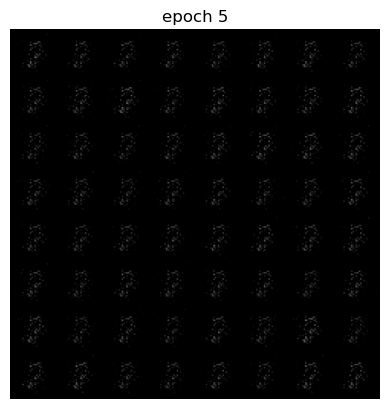

  1%|          | 1/117 [00:00<00:17,  6.45it/s]

Epoch 5 of 100
Generator loss: 0.38350455, Discriminator loss: 1.42162094


118it [00:18,  6.39it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.47it/s]

Epoch 6 of 100
Generator loss: 0.38363823, Discriminator loss: 1.42291696


118it [00:17,  6.67it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.56it/s]

Epoch 7 of 100
Generator loss: 0.38309276, Discriminator loss: 1.42204617


118it [00:18,  6.26it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.55it/s]

Epoch 8 of 100
Generator loss: 0.38363486, Discriminator loss: 1.42188746


118it [00:19,  5.94it/s]                         
  1%|          | 1/117 [00:00<00:21,  5.41it/s]

Epoch 9 of 100
Generator loss: 0.38303467, Discriminator loss: 1.42174698


118it [00:18,  6.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


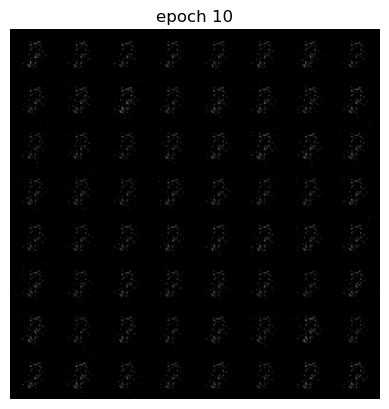

  1%|          | 1/117 [00:00<00:17,  6.78it/s]

Epoch 10 of 100
Generator loss: 0.38335037, Discriminator loss: 1.42251928


118it [00:17,  6.71it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.61it/s]

Epoch 11 of 100
Generator loss: 0.38353061, Discriminator loss: 1.42141112


118it [00:18,  6.49it/s]                         
  1%|          | 1/117 [00:00<00:19,  6.10it/s]

Epoch 12 of 100
Generator loss: 0.38330423, Discriminator loss: 1.42371413


118it [00:17,  6.61it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.68it/s]

Epoch 13 of 100
Generator loss: 0.38377202, Discriminator loss: 1.42192303


118it [00:18,  6.53it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.53it/s]

Epoch 14 of 100
Generator loss: 0.38345552, Discriminator loss: 1.42329607


118it [00:18,  6.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


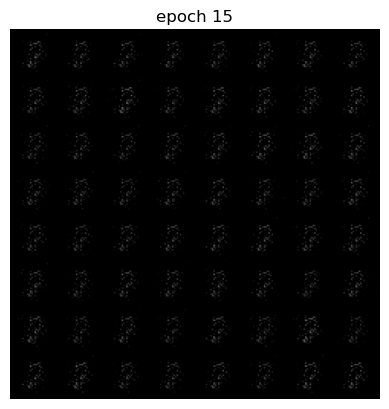

  1%|          | 1/117 [00:00<00:20,  5.72it/s]

Epoch 15 of 100
Generator loss: 0.38312659, Discriminator loss: 1.42258424


118it [00:18,  6.43it/s]                         
  1%|          | 1/117 [00:00<00:19,  6.07it/s]

Epoch 16 of 100
Generator loss: 0.38328928, Discriminator loss: 1.42136840


118it [00:18,  6.38it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.34it/s]

Epoch 17 of 100
Generator loss: 0.38329544, Discriminator loss: 1.42297212


118it [00:18,  6.40it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.48it/s]

Epoch 18 of 100
Generator loss: 0.38343037, Discriminator loss: 1.42262450


118it [00:18,  6.36it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.44it/s]

Epoch 19 of 100
Generator loss: 0.38333113, Discriminator loss: 1.42321122


118it [00:18,  6.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


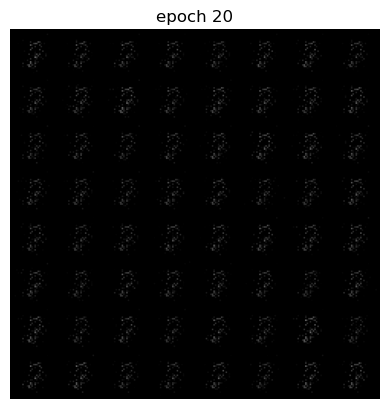

  1%|          | 1/117 [00:00<00:21,  5.41it/s]

Epoch 20 of 100
Generator loss: 0.38352373, Discriminator loss: 1.42212169


118it [00:18,  6.27it/s]                         
  1%|          | 1/117 [00:00<00:21,  5.35it/s]

Epoch 21 of 100
Generator loss: 0.38315284, Discriminator loss: 1.42287037


118it [00:18,  6.44it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.36it/s]

Epoch 22 of 100
Generator loss: 0.38375038, Discriminator loss: 1.42024759


118it [00:19,  6.10it/s]                         
  1%|          | 1/117 [00:00<00:19,  5.84it/s]

Epoch 23 of 100
Generator loss: 0.38316362, Discriminator loss: 1.42239498


118it [00:19,  5.92it/s]                         
  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 24 of 100
Generator loss: 0.38359115, Discriminator loss: 1.42322053


118it [00:18,  6.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


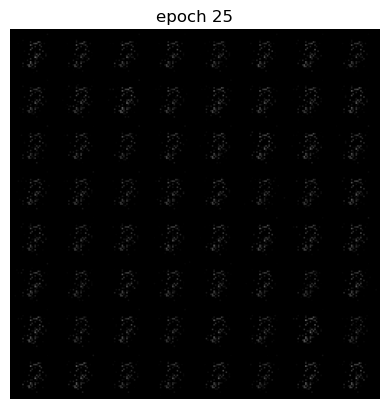

  1%|          | 1/117 [00:00<00:18,  6.42it/s]

Epoch 25 of 100
Generator loss: 0.38350689, Discriminator loss: 1.42249794


118it [00:18,  6.55it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.66it/s]

Epoch 26 of 100
Generator loss: 0.38367902, Discriminator loss: 1.42246053


118it [00:19,  6.00it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.15it/s]

Epoch 27 of 100
Generator loss: 0.38332089, Discriminator loss: 1.42143549


118it [00:19,  5.92it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.21it/s]

Epoch 28 of 100
Generator loss: 0.38371941, Discriminator loss: 1.42084613


118it [00:18,  6.24it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.62it/s]

Epoch 29 of 100
Generator loss: 0.38325594, Discriminator loss: 1.42242382


118it [00:18,  6.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


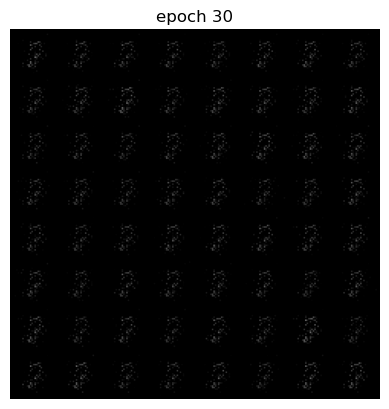

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 30 of 100
Generator loss: 0.38367419, Discriminator loss: 1.42304817


118it [00:17,  6.62it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.53it/s]

Epoch 31 of 100
Generator loss: 0.38313813, Discriminator loss: 1.42199217


118it [00:18,  6.32it/s]                         
  1%|          | 1/117 [00:00<00:19,  5.97it/s]

Epoch 32 of 100
Generator loss: 0.38361324, Discriminator loss: 1.42138954


118it [00:17,  6.57it/s]                         
  1%|          | 1/117 [00:00<00:19,  5.97it/s]

Epoch 33 of 100
Generator loss: 0.38344533, Discriminator loss: 1.42279910


118it [00:18,  6.45it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.61it/s]

Epoch 34 of 100
Generator loss: 0.38319107, Discriminator loss: 1.42175476


118it [00:18,  6.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


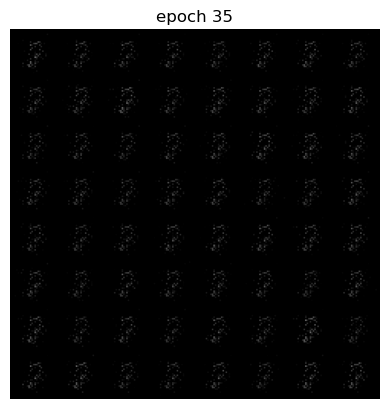

  1%|          | 1/117 [00:00<00:16,  6.99it/s]

Epoch 35 of 100
Generator loss: 0.38343613, Discriminator loss: 1.42087773


118it [00:18,  6.36it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.55it/s]

Epoch 36 of 100
Generator loss: 0.38348123, Discriminator loss: 1.42192689


118it [00:18,  6.46it/s]                         
  1%|          | 1/117 [00:00<00:19,  6.00it/s]

Epoch 37 of 100
Generator loss: 0.38364837, Discriminator loss: 1.42197171


118it [00:17,  6.56it/s]                         
  1%|          | 1/117 [00:00<00:19,  6.04it/s]

Epoch 38 of 100
Generator loss: 0.38343289, Discriminator loss: 1.42291349


118it [00:17,  6.62it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.35it/s]

Epoch 39 of 100
Generator loss: 0.38299921, Discriminator loss: 1.42233478


118it [00:18,  6.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


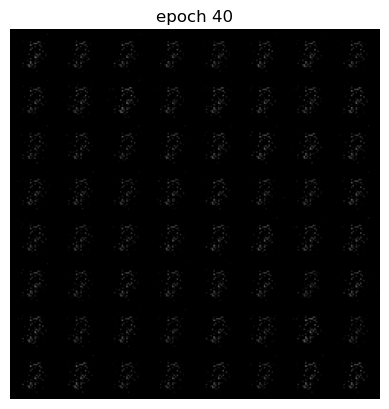

  1%|          | 1/117 [00:00<00:20,  5.68it/s]

Epoch 40 of 100
Generator loss: 0.38346128, Discriminator loss: 1.42419840


118it [00:19,  6.09it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.59it/s]

Epoch 41 of 100
Generator loss: 0.38284240, Discriminator loss: 1.42325575


118it [00:18,  6.53it/s]                         
  1%|          | 1/117 [00:00<00:21,  5.27it/s]

Epoch 42 of 100
Generator loss: 0.38344838, Discriminator loss: 1.42286699


118it [00:18,  6.35it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.62it/s]

Epoch 43 of 100
Generator loss: 0.38327975, Discriminator loss: 1.42226048


118it [00:18,  6.41it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.16it/s]

Epoch 44 of 100
Generator loss: 0.38334852, Discriminator loss: 1.42261880


118it [00:18,  6.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


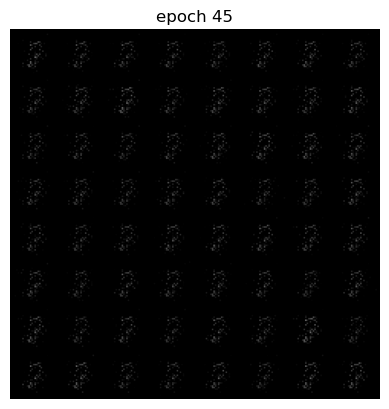

  1%|          | 1/117 [00:00<00:21,  5.47it/s]

Epoch 45 of 100
Generator loss: 0.38312126, Discriminator loss: 1.42177971


118it [00:18,  6.25it/s]                         
  1%|          | 1/117 [00:00<00:21,  5.29it/s]

Epoch 46 of 100
Generator loss: 0.38380451, Discriminator loss: 1.42202316


118it [00:20,  5.84it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.42it/s]

Epoch 47 of 100
Generator loss: 0.38325440, Discriminator loss: 1.42015341


118it [00:16,  7.16it/s]                         
  1%|          | 1/117 [00:00<00:16,  6.99it/s]

Epoch 48 of 100
Generator loss: 0.38303895, Discriminator loss: 1.42282864


118it [00:16,  7.01it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.59it/s]

Epoch 49 of 100
Generator loss: 0.38333238, Discriminator loss: 1.42270174


118it [00:16,  7.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


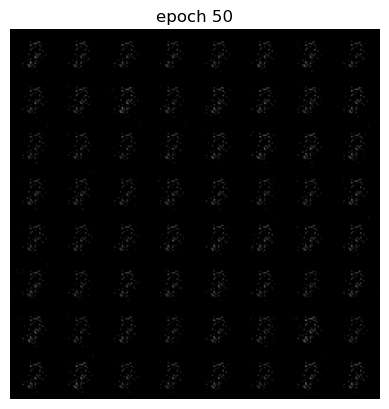

  1%|          | 1/117 [00:00<00:17,  6.56it/s]

Epoch 50 of 100
Generator loss: 0.38346129, Discriminator loss: 1.42141280


118it [00:15,  7.44it/s]                         
  1%|          | 1/117 [00:00<00:16,  7.19it/s]

Epoch 51 of 100
Generator loss: 0.38375829, Discriminator loss: 1.42148265


118it [00:15,  7.44it/s]                         
  1%|          | 1/117 [00:00<00:16,  7.22it/s]

Epoch 52 of 100
Generator loss: 0.38312572, Discriminator loss: 1.42123389


118it [00:16,  7.20it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.38it/s]

Epoch 53 of 100
Generator loss: 0.38378400, Discriminator loss: 1.42221369


118it [00:16,  7.22it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.38it/s]

Epoch 54 of 100
Generator loss: 0.38348465, Discriminator loss: 1.42360875


118it [00:16,  7.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


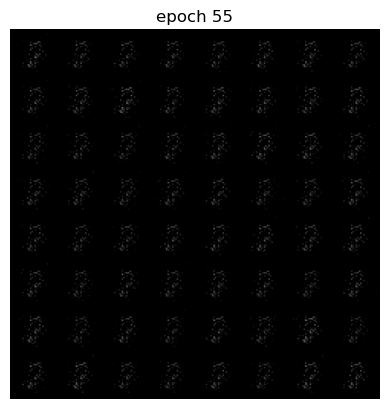

  1%|          | 1/117 [00:00<00:18,  6.16it/s]

Epoch 55 of 100
Generator loss: 0.38335387, Discriminator loss: 1.42287951


118it [00:17,  6.88it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.61it/s]

Epoch 56 of 100
Generator loss: 0.38405212, Discriminator loss: 1.42241850


118it [00:17,  6.85it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.48it/s]

Epoch 57 of 100
Generator loss: 0.38333481, Discriminator loss: 1.42268115


118it [00:16,  7.28it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.51it/s]

Epoch 58 of 100
Generator loss: 0.38346871, Discriminator loss: 1.42224359


118it [00:15,  7.49it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.72it/s]

Epoch 59 of 100
Generator loss: 0.38311761, Discriminator loss: 1.42209469


118it [00:16,  7.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


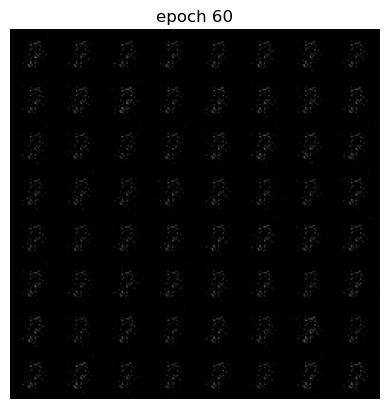

  1%|          | 1/117 [00:00<00:16,  6.92it/s]

Epoch 60 of 100
Generator loss: 0.38353379, Discriminator loss: 1.42185581


118it [00:16,  7.03it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.60it/s]

Epoch 61 of 100
Generator loss: 0.38353524, Discriminator loss: 1.42398798


118it [00:17,  6.93it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.35it/s]

Epoch 62 of 100
Generator loss: 0.38358716, Discriminator loss: 1.42219565


118it [00:16,  7.15it/s]                         
  1%|          | 1/117 [00:00<00:16,  7.15it/s]

Epoch 63 of 100
Generator loss: 0.38351148, Discriminator loss: 1.42097531


118it [00:17,  6.80it/s]                         
  1%|          | 1/117 [00:00<00:15,  7.39it/s]

Epoch 64 of 100
Generator loss: 0.38330899, Discriminator loss: 1.42341599


118it [00:16,  7.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


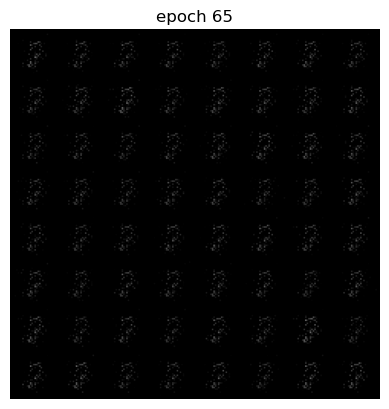

  1%|          | 1/117 [00:00<00:16,  6.87it/s]

Epoch 65 of 100
Generator loss: 0.38333412, Discriminator loss: 1.42257673


118it [00:17,  6.64it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.74it/s]

Epoch 66 of 100
Generator loss: 0.38333446, Discriminator loss: 1.42218729


118it [00:16,  7.11it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.51it/s]

Epoch 67 of 100
Generator loss: 0.38333281, Discriminator loss: 1.42156406


118it [00:20,  5.76it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.72it/s]

Epoch 68 of 100
Generator loss: 0.38367536, Discriminator loss: 1.42093068


118it [00:18,  6.53it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.70it/s]

Epoch 69 of 100
Generator loss: 0.38343982, Discriminator loss: 1.42275347


118it [00:17,  6.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


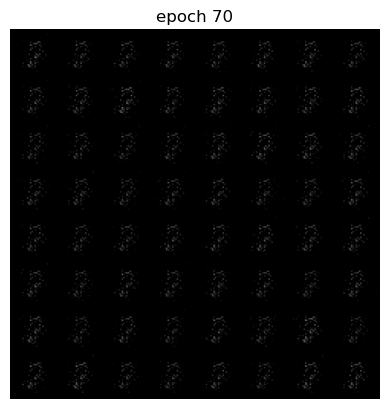

  1%|          | 1/117 [00:00<00:19,  5.91it/s]

Epoch 70 of 100
Generator loss: 0.38359518, Discriminator loss: 1.42284221


118it [00:17,  6.65it/s]                         
  1%|          | 1/117 [00:00<00:20,  5.59it/s]

Epoch 71 of 100
Generator loss: 0.38306244, Discriminator loss: 1.42331202


118it [00:18,  6.34it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.23it/s]

Epoch 72 of 100
Generator loss: 0.38326635, Discriminator loss: 1.42290940


118it [00:18,  6.42it/s]                         
  1%|          | 1/117 [00:00<00:21,  5.30it/s]

Epoch 73 of 100
Generator loss: 0.38371517, Discriminator loss: 1.42222216


118it [00:18,  6.49it/s]                         
  1%|          | 1/117 [00:00<00:22,  5.17it/s]

Epoch 74 of 100
Generator loss: 0.38370745, Discriminator loss: 1.42137768


118it [00:20,  5.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


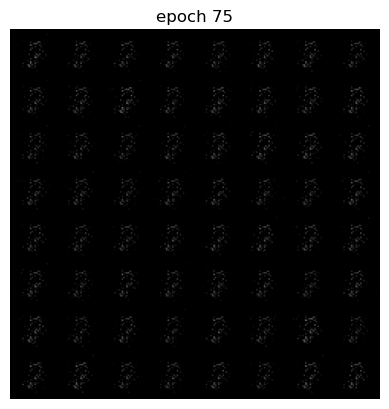

  1%|          | 1/117 [00:00<00:21,  5.49it/s]

Epoch 75 of 100
Generator loss: 0.38356238, Discriminator loss: 1.42156324


118it [00:18,  6.39it/s]                         
  1%|          | 1/117 [00:00<00:18,  6.34it/s]

Epoch 76 of 100
Generator loss: 0.38299850, Discriminator loss: 1.42428736


118it [00:20,  5.78it/s]                         
  1%|          | 1/117 [00:00<00:21,  5.42it/s]

Epoch 77 of 100
Generator loss: 0.38338471, Discriminator loss: 1.42279719


118it [00:18,  6.43it/s]                         
  1%|          | 1/117 [00:00<00:19,  6.02it/s]

Epoch 78 of 100
Generator loss: 0.38360597, Discriminator loss: 1.42375167


118it [00:17,  6.62it/s]                         
  1%|          | 1/117 [00:00<00:17,  6.67it/s]

Epoch 79 of 100
Generator loss: 0.38335355, Discriminator loss: 1.42250474


118it [00:17,  6.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


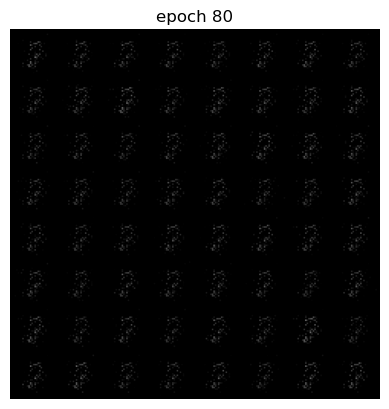

  1%|          | 1/117 [00:00<00:19,  5.88it/s]

Epoch 80 of 100
Generator loss: 0.38383042, Discriminator loss: 1.42182264


 73%|███████▎  | 85/117 [00:15<00:05,  5.51it/s]


KeyboardInterrupt: 

In [28]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    output = output.view(-1, 1)
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    output = output.view(-1, 1)
    return criterion(output, true_label)
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        real, _ = data
        real = real.to(device)
        # add noise to real data for smoothing
        noisy_real = real + torch.randn_like(real) * 0.1
        # clamp data to stay in range
        noisy_real = torch.clamp(noisy_real, 0, 1)

        b_size = len(real)
        train_noise = create_noise(b_size, nz)
        fake = generator(train_noise)

        real_label = label_real(b_size)
        fake_label = label_fake(b_size)
        
        # === TRAIN DISCRIMINATOR ===

        # Pass real images
        output = discriminator(real).view(-1)
        d_loss = discriminator_loss(output, real_label)

        # Pass fake images
        output = discriminator(fake.detach()).view(-1)
        d_loss += discriminator_loss(output, fake_label)

        # Backpropagation
        discriminator.zero_grad()
        d_loss.backward()
        optim_d.step()
        scheduler_d.step()

        # === TRAIN GENERATOR ===

        output = discriminator(fake).view(-1)
        g_loss = generator_loss(output, real_label)
        #g_loss = torch.mean(torch.log(1 - output)) # alternate loss (for descent)

        # Backpropagation
        generator.zero_grad()
        g_loss.backward()
        optim_g.step()
        scheduler_g.step()

        # Add new losses
        loss_g += g_loss.item()
        loss_d += d_loss.item()
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [ ]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [ ]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

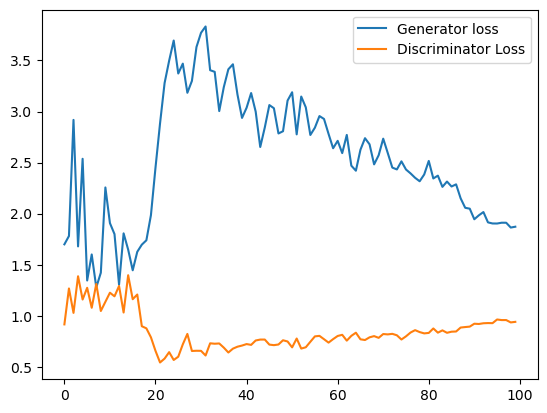

In [ ]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')